# Basic file manipulation and data loading
We start with the well-known zip code example. The data can be downloaded from the website of [Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.train.gz) book. 
Extract the file and then give the file address to read the text "zip.train" file.

In [31]:
import numpy as np
zipdata=np.loadtxt("../data/zip.train")

In [32]:
zipdata[0:2,:]

array([[ 6.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -0.631,  0.862, -0.167, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.992,
         0.297,  1.   ,  0.307, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.41 ,
         1.   ,  0.986, -0.565, -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.683,  0.825,
         1.   ,  0.562, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   , -0.938,  0.54 ,  1.   ,
         0.778, -0.715, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -1.   ,  0.1  ,  1.   ,  0.922,
        -0.439, -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   ,
        -1.   , -1.   , -1.   , -1.   , -0.257,  0.95 ,  1.   , -0.162,
        -1.   , -1.   , -1.   , -0.987, -0.714, -0.832, -1.   , 

The data contains $7291\times 257$ digit samples, first column is the storted digit and the remaining 256 is a $16 \times 16$ grayscale image.
Now we plot the first row of the data.

(-0.5, 15.5, 15.5, -0.5)

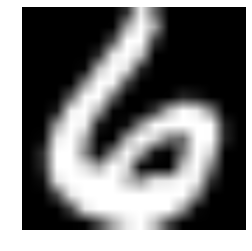

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(zipdata[0,1:257].reshape(16,16),"gray")# grayscale reversed already
plt.axis("off")

In order to modify the plot remember the pyplot help [here](http://matplotlib.org/api/pyplot_api.html).

Now we create 2 datasets one for the digit 3 and another for the digit 8. Then we plot 10 random samples of each dataset.


In [34]:
zipdata3=zipdata[zipdata[:,0]==3]
zipdata8=zipdata[zipdata[:,0]==8]

In [35]:
np.random.seed(10)
random3=np.random.choice(range(len(zipdata3)),size=10,replace=False)              

(-0.5, 159.5, 15.5, -0.5)

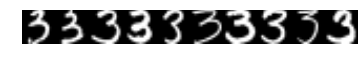

In [36]:
zipdata3stack=np.empty((16,16))
zipdata3stack=zipdata3[random3[0],1:].reshape(16,16)
for i in range(1,len(random3)):
    zipdata3stack=np.hstack((zipdata3stack,zipdata3[random3[i],1:].reshape(16,16)))
plt.imshow(zipdata3stack,"gray")
plt.axis("off")

(-0.5, 159.5, 15.5, -0.5)

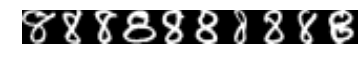

In [37]:
random8=np.random.choice(range(len(zipdata8)),size=10,replace=False)              
zipdata8stack=np.empty((16,16))
zipdata8stack=zipdata8[random8[0],1:].reshape(16,16)
for i in range(1,len(random8)):
    zipdata8stack=np.hstack((zipdata8stack,zipdata8[random8[i],1:].reshape(16,16)))
plt.imshow(zipdata8stack,"gray")
plt.axis("off")

(-0.5, 159.5, 31.5, -0.5)

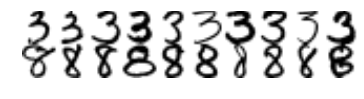

In [38]:
plt.imshow(-np.vstack((zipdata3stack,zipdata8stack)),"gray")
plt.axis("off")

# Principal components projection
Compare two different dimension reduction techniques on all 10 digits data: the principal components and linear discriminant axes. We start with the principal components


In [39]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

x=zipdata[:,1:]
y=zipdata[:,0]

pca=PCA(n_components=2)
zipdata_pca=pca.fit(x).transform(x)

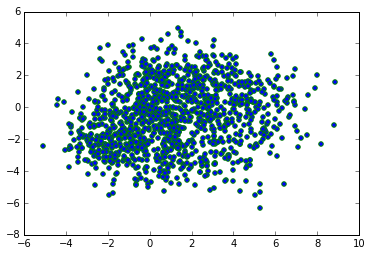

In [40]:
index=(zipdata[:,0]==2) | (zipdata[:,0]==5)
plt.scatter(zipdata_pca[index,0],zipdata_pca[index,1],edgecolor="g")

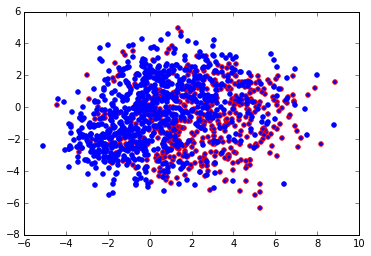

In [41]:
plt.scatter(zipdata_pca[y==5,0],zipdata_pca[y==5,1],edgecolor="r")
plt.scatter(zipdata_pca[y==2,0],zipdata_pca[y==2,1],edgecolor="b")

# Linear discriminant projection
The linear discriminant projection finds a linear combination of the attributes so that they are the most separable possible. It can be shown that the principal component projection is a special case of the linear discriminant projection. For the linear discriminant you require a classification vector. The number of projections in lindear discriminant is maximum the number of class -1.



In [42]:
lda=LDA(n_components=3)
zipdata_lda=lda.fit(x,y).transform(x)

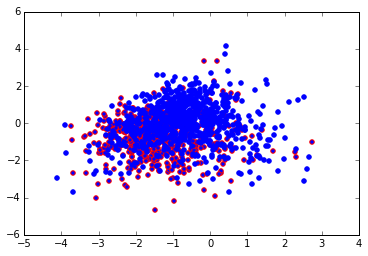

In [43]:
plt.scatter(zipdata_lda[y==5,0],zipdata_lda[y==5,1],edgecolor="r")
plt.scatter(zipdata_lda[y==2,0],zipdata_lda[y==2,1],edgecolor="b")

# 3D scatter plot
Now lets try 3D plots

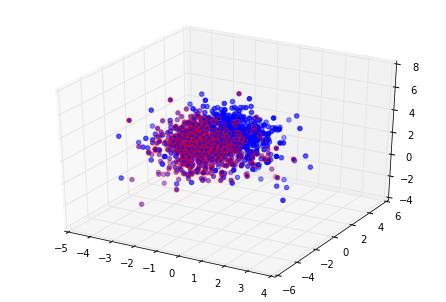

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(zipdata_lda[y==5,0],zipdata_lda[y==5,1],zipdata_lda[y==5,2],edgecolor="r")
ax.scatter(zipdata_lda[y==2,0],zipdata_lda[y==2,1],zipdata_lda[y==2,2],edgecolor="b")

# Exercise
Create a subset of data only including digits 2 and 5. 
Run the binary support vector machines of chapter 3 on the subset of the zip data for only digits 2 and 5.

In [48]:
x25=zipdata_lda[index,:]
y25=zipdata[index,0]
from sklearn import svm
clf = svm.SVC()
clf.fit(x25, y25)
y25_hat=clf.predict(x25)
from sklearn.metrics import confusion_matrix
confusion_matrix(y25,y25_hat)/float(len(y25))

array([[ 0.42035742,  0.14763015],
       [ 0.10878011,  0.32323232]])